<a href="https://colab.research.google.com/github/mrsferret/Machine-Learning-ITNPBD6-/blob/main/Newspaper_Numeric_Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Logistic Regression
This notebook performs logistic regression on the newspaper sales example from the lectures. The model classifies a newspaper as likely to sell out or not, given current printing levels.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


## Load the training data

In [ ]:
# loading directly to a numpy array rather than pandas dataframe
data = np.loadtxt('Newspaper_SoldOut.csv', delimiter=",", skiprows=1)

## Extract the inputs and outputs into different Numpy arrays

In [ ]:
cols = data.shape[1]
X = data[:,0:cols-1]
y = data[:,cols-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Fit a logistic regression model with l2 regularisation

In [ ]:
log_reg = LogisticRegression(solver='liblinear', penalty='l2')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## Print the accuracy measure on the test data

In [ ]:
print("Test Accuracy =",log_reg.score(X_test, y_test))

Test Accuracy = 0.7946428571428571


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[49, 14],
       [ 9, 40]])

# Plot of probability of selling out against advert spend

Text(0, 0.5, 'Probability of Selling Out')

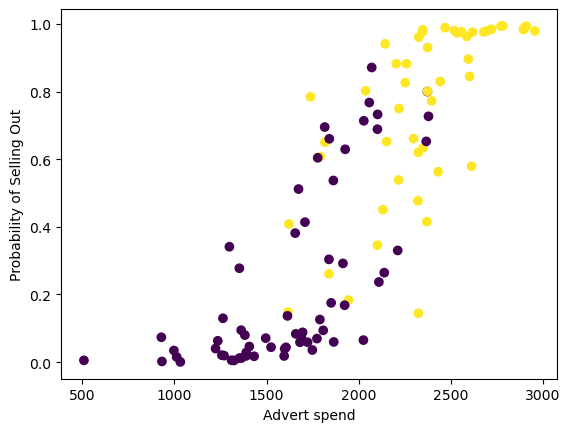

In [ ]:
import matplotlib.pyplot as plt

# the points on x-axis will be the advert spend, column 0 in our test data
X = X_test[:,0]

# the points on the y-axis are probabilities from the model
# predict_proba() gets the probabilities for all classes
# [:,1] gets the probabilities for the second class (1, or "sold out")
Y = log_reg.predict_proba(X_test)[:,1]

# now plot... c=y_test makes the colour of the points reflect the true class values in the test data
plt.scatter(X,Y,c=y_test)
plt.xlabel("Advert spend")
plt.ylabel("Probability of Selling Out")

# so: Here is the plot of probability of selling out against advert spend.
# The colour of the points reflects the true outcomes in the target data.
# You can see the logistic shape, and the fact that the errors are made mostly
# in the middle region where there is more uncertainty. To see the relationship
# for other variables, select a different Axis x: change the 0 in "X = X_test[:,0]"

## Predict whether we might sell out today, with this data:
<table>
    <tr><td>Advert Spend</td><td>Price</td><td>Prize Value</td><td>Wet?</td></tr>
<tr><td>1757</td><td>60</td><td>30</td><td>1</td></tr>
</table>
According to the data, this should produce a class of 0 (prediction can be 0 or 1 here)

In [ ]:
today = [[1757,60,30,1]]
print(log_reg.predict(today))

[0.]
